# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Written description of three observable trends based on the data

1. The correlation between humidity and Latitude as well as with cloudiness and Latitude is weak for both the northern and sourthern hemisphere.

    Northern Humidity & Latitude - The r-squared is: 0.001069395808224942
    
    Southern Humidity & Latitude - The r-squared is: 0.029691729086400647
    
    Northern Humidity & Cloudiness - The r-squared is: 0.004074308031667644
    
    Southern Humidity & Cloudiness - The r-squared is: 0.04878872239062073
    
    
2. The correlation between maximum temperture and Latitude is strong for both the northern and sourthern hemisphere.

    Northern Maximum Temperture & Latitude - The r-squared is: 0.4204745975531857
    
    Southern Maximum Temperture & Latitude - The r-squared is: 0.6606240023394496
    
    
3. Majority of the cities have a wind speed below 10 KM/H. 584 out of 592 cities have wind speed below 10 KM/H 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint
from scipy.stats import linregress
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Run Response
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

In [33]:
# Set Up List to hold Information
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Set Processing Record Number at 1
processing_record = 1

# Print Starting Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:

    # Exception Handling 
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_record = response["name"]
        
        # Print Successfull Processing Record Response 
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record
        processing_record += 1
    except:
        
        # Print Error Message
        print("City not found. Skipping...")
        
    continue

# Print End Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Albany
Processing Record 2 | Bafia
Processing Record 3 | Camargo
Processing Record 4 | Atuona
Processing Record 5 | Yellowknife
Processing Record 6 | Yulara
Processing Record 7 | Ushuaia
Processing Record 8 | São José da Coroa Grande
Processing Record 9 | Datong
Processing Record 10 | Mataura
Processing Record 11 | Upernavik
City not found. Skipping...
Processing Record 12 | Oistins
Processing Record 13 | Kuusamo
Processing Record 14 | Longyearbyen
Processing Record 15 | Guerrero Negro
Processing Record 16 | Kapaa
Processing Record 17 | Vutcani
Processing Record 18 | Beringovskiy
Processing Record 19 | Hithadhoo
Processing Record 20 | Hilo
Processing Record 21 | Avarua
Processing Record 22 | Bogorodskoye
Processing Record 23 | Leningradskiy
Processing Record 24 | Butaritari
Processing Record 25 | Ingham
Processing Record 26 | Havre-St-Pierre
Processing Record 27 | Bom Jesus
Processing Record 28 | Dikson
City

Processing Record 229 | Seoul
Processing Record 230 | Zhangye
Processing Record 231 | Inta
Processing Record 232 | São Félix do Xingu
Processing Record 233 | Nyurba
Processing Record 234 | Sheridan
Processing Record 235 | Vila Velha
Processing Record 236 | Tevaitoa
Processing Record 237 | Stann Creek Town
Processing Record 238 | San Blas
Processing Record 239 | Tasiilaq
Processing Record 240 | Severodvinsk
Processing Record 241 | Kiryat Gat
Processing Record 242 | Constitución
Processing Record 243 | Neyshabur
Processing Record 244 | Beloha
City not found. Skipping...
Processing Record 245 | Rawson
Processing Record 246 | Sept-Îles
Processing Record 247 | Kozhva
Processing Record 248 | Belaya Gora
Processing Record 249 | Orocué
Processing Record 250 | Oranjemund
Processing Record 251 | Abonnema
Processing Record 252 | Sangar
Processing Record 253 | Tara
Processing Record 254 | Muisne
Processing Record 255 | Mackenzie
Processing Record 256 | Kawalu
Processing Record 257 | Pedernales
Pro

Processing Record 461 | Kjøllefjord
City not found. Skipping...
Processing Record 462 | Jiamusi
Processing Record 463 | Koungou
Processing Record 464 | Ambatondrazaka
Processing Record 465 | Riohacha
Processing Record 466 | Samarai
City not found. Skipping...
City not found. Skipping...
Processing Record 467 | Antofagasta
Processing Record 468 | Kotlas
Processing Record 469 | Moose Factory
Processing Record 470 | Hambantota
Processing Record 471 | Todos Santos
Processing Record 472 | Ivanovka
Processing Record 473 | Dois Vizinhos
Processing Record 474 | Rio Grande
Processing Record 475 | Touros
Processing Record 476 | Belmonte
Processing Record 477 | Bodden Town
Processing Record 478 | Baena
Processing Record 479 | Hailey
Processing Record 480 | Duxbury
Processing Record 481 | Jumla
Processing Record 482 | Seybaplaya
Processing Record 483 | Namwala
Processing Record 484 | Carauari
Processing Record 485 | Province of Mantua
Processing Record 486 | Erenhot
Processing Record 487 | Moindou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
# Create Dictionary of required data
dictionary = {
    "City":city_name,
    "Lat":lat,
    "Lng":lng,
    "Maximum Temperture":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
}

# Create a Dataframe of Weather Data
weather_data = pd.DataFrame(dictionary)

# Count number of Rows
weather_data.count()

City                  581
Lat                   581
Lng                   581
Maximum Temperture    581
Humidity              581
Cloudiness            581
Wind Speed            581
Country               581
Date                  581
dtype: int64

In [35]:
# Display DataFrame
weather_data.head()

,City,Lat,Lng,Maximum Temperture,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,22.78,68,100,1.33,US,1594775325
1,Bafia,4.75,11.23,20.03,97,100,0.88,CM,1594775325
2,Camargo,27.67,-105.17,36.22,10,0,7.94,MX,1594775325
3,Atuona,-9.80,-139.03,26.64,76,0,8.92,PF,1594775325
4,Yellowknife,62.46,-114.35,13.00,100,90,6.20,CA,1594775321


In [36]:
# Export Weather Data into CSV file
weather_data.to_csv("Weather Data.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
# Determine if data set contains cities with a humidity greater than 100%
humidity_values = weather_data["Humidity"]
sorted_humidity_values = humidity_values.sort_values(ascending=False)
sorted_humidity_values

12     100
40     100
578    100
187    100
399    100
      ... 
221      9
366      8
409      4
452      3
371      3
Name: Humidity, Length: 581, dtype: int64

There are no cities with a humidity greater than 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

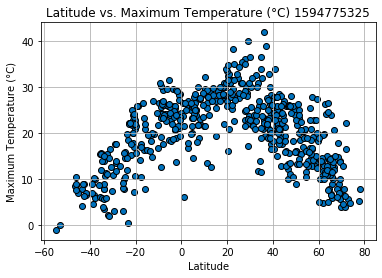

In [38]:
# Plot Figure Size
plt.figure(figsize=(6,4))

# Plot Scatter Plot for Latitude and Temperature
plt.scatter(weather_data["Lat"],weather_data["Maximum Temperture"],facecolors="#0072BD",marker="o",edgecolor="black")
weather_date = weather_data['Date'][0]
# Plt Grid Lines
plt.grid()

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title(f"Latitude vs. Maximum Temperature (°C) {weather_date}")
plt.ylabel("Maximum Temperature (°C)")
plt.xlabel("Latitude")

# Save Figure
plt.savefig("Images/Latitude_vs_Maximum_Temperature.png")

## Latitude vs. Humidity Plot

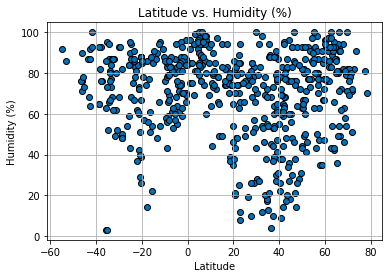

In [39]:
# Plot Figure Size
plt.figure(figsize=(6,4))

# Plot Scatter Plot for Latitude and Temperature
plt.scatter(weather_data["Lat"],weather_data["Humidity"],facecolors="#0072BD",marker="o",edgecolor="black")

# Plt Grid Lines
plt.grid()

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save Figure
plt.savefig("Images/Latitude_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

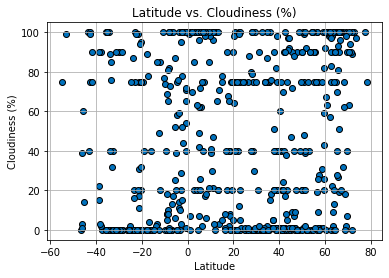

In [40]:
# Plot Figure Size
plt.figure(figsize=(6,4))

# Plot Scatter Plot for Latitude and Temperature
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"],facecolors="#0072BD",marker="o",edgecolor="black")

# Plt Grid Lines
plt.grid()

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save Figure
plt.savefig("Images/Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

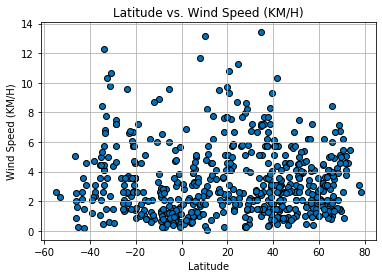

In [41]:
# Plot Figure Size
plt.figure(figsize=(6,4))

# Plot Scatter Plot for Latitude and Temperature
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"],facecolors="#0072BD",marker="o",edgecolor="black")

# Plt Grid Lines
plt.grid()

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Latitude vs. Wind Speed (KM/H)")
plt.ylabel("Wind Speed (KM/H)")
plt.xlabel("Latitude")

# Save Figure
plt.savefig("Images/Latitude_vs_Wind_Speed.png")

In [42]:
KM_cities = weather_data.loc[weather_data["Wind Speed"]<10]
less_10KM = pd.DataFrame(KM_cities)
less_10KM["Wind Speed"].count()

572

## Linear Regression

In [43]:
# OPTIONAL: Create a function to create Linear Regression plots

In [44]:
# Create Northern and Southern Hemisphere DataFrames
northern_weather_data = weather_data.loc[weather_data["Lat"]>0]
southern_weather_data = weather_data.loc[weather_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4033935833460772


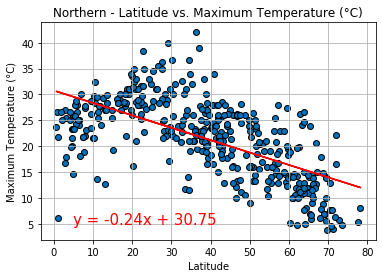

In [45]:
# Plot Scatter Plot for Northern Latitude and Temperature
plt.scatter(northern_weather_data["Lat"],northern_weather_data["Maximum Temperture"],facecolors="#0072BD",marker="o",edgecolor="black")

# Plt Grid Lines
plt.grid()

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Northern - Latitude vs. Maximum Temperature (°C)")
plt.ylabel("Maximum Temperature (°C)")
plt.xlabel("Latitude")

# Define x-value as Latitude
x_values = northern_weather_data["Lat"]

# Define y-value as Maximum Temperture
y_values = northern_weather_data["Maximum Temperture"]

# Perform the Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate Regression Values
regress_values = x_values * slope + intercept

# Caluclate liner equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print coefficient of determination (R-squared)
print(f"The r-squared is: {rvalue**2}")

# Plot line
plt.plot(x_values,regress_values,"r")

# Plot liner equation
plt.annotate(line_eq,(5,5),fontsize=15,color="red")

# Save Figure
plt.savefig("Images/Northern_Latitude_vs_Maximum_Temperature.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6447436752841567


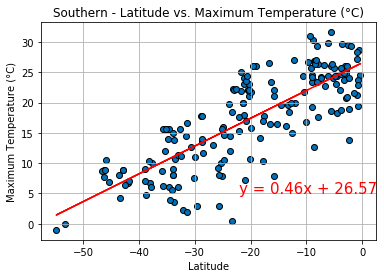

In [46]:
# Plot Scatter Plot for Southern Latitude and Temperature
plt.scatter(southern_weather_data["Lat"],southern_weather_data["Maximum Temperture"],facecolors="#0072BD",marker="o",edgecolor="black")

# Plt Grid Lines
plt.grid()

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Southern - Latitude vs. Maximum Temperature (°C)")
plt.ylabel("Maximum Temperature (°C)")
plt.xlabel("Latitude")

# Define x-value as Latitude
x_values = southern_weather_data["Lat"]

# Define y-value as Maximum Temperture
y_values = southern_weather_data["Maximum Temperture"]

# Perform the Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate Regression Values
regress_values = x_values * slope + intercept

# Caluclate liner equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print coefficient of determination (R-squared)
print(f"The r-squared is: {rvalue**2}")

# Plot line
plt.plot(x_values,regress_values,"r")

# Plot liner equation
plt.annotate(line_eq,(-22,5),fontsize=15,color="red")

# Save Figure
plt.savefig("Images/Southern_Latitude_vs_Maximum_Temperature.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00026480051494275124


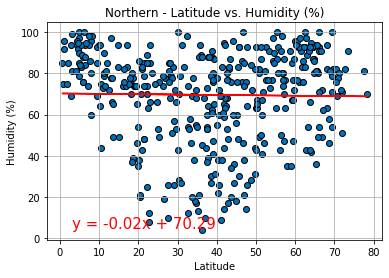

In [47]:
# Plot Scatter Plot for Southern Latitude and Temperature
plt.scatter(northern_weather_data["Lat"],northern_weather_data["Humidity"],facecolors="#0072BD",marker="o",edgecolor="black")

# Plt Grid Lines
plt.grid()

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Northern - Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Define x-value as Latitude
x_values = northern_weather_data["Lat"]

# Define y-value as Maximum Temperture
y_values = northern_weather_data["Humidity"]

# Perform the Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate Regression Values
regress_values = x_values * slope + intercept

# Caluclate liner equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print coefficient of determination (R-squared)
print(f"The r-squared is: {rvalue**2}")

# Plot line
plt.plot(x_values,regress_values,"r")

# Plot liner equation
plt.annotate(line_eq,(3,5),fontsize=15,color="red")

# Save Figure
plt.savefig("Images/Northern_Latitude_vs_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 8.328106002905557e-05


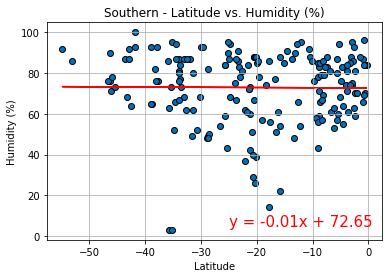

In [48]:
# Plot Scatter Plot for Southern Latitude and Temperature
plt.scatter(southern_weather_data["Lat"],southern_weather_data["Humidity"],facecolors="#0072BD",marker="o",edgecolor="black")

# Plt Grid Lines
plt.grid()

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Southern - Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Define x-value as Latitude
x_values = southern_weather_data["Lat"]

# Define y-value as Maximum Temperture
y_values = southern_weather_data["Humidity"]

# Perform the Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate Regression Values
regress_values = x_values * slope + intercept

# Caluclate liner equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print coefficient of determination (R-squared)
print(f"The r-squared is: {rvalue**2}")

# Plot line
plt.plot(x_values,regress_values,"r")

# Plot liner equation
plt.annotate(line_eq,(-25,5),fontsize=15,color="red")

# Save Figure
plt.savefig("Images/Southern_Latitude_vs_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003839333067113489


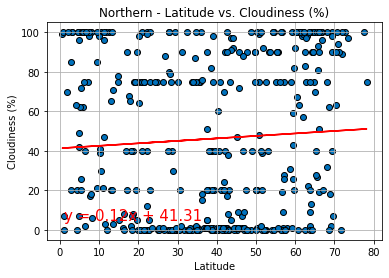

In [49]:
# Plot Scatter Plot for Southern Latitude and Temperature
plt.scatter(northern_weather_data["Lat"],northern_weather_data["Cloudiness"],facecolors="#0072BD",marker="o",edgecolor="black")

# Plt Grid Lines
plt.grid()

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Northern - Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Define x-value as Latitude
x_values = northern_weather_data["Lat"]

# Define y-value as Maximum Temperture
y_values = northern_weather_data["Cloudiness"]

# Perform the Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate Regression Values
regress_values = x_values * slope + intercept

# Caluclate liner equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print coefficient of determination (R-squared)
print(f"The r-squared is: {rvalue**2}")

# Plot line
plt.plot(x_values,regress_values,"r")

# Plot liner equation
plt.annotate(line_eq,(1,5),fontsize=15,color="red")

# Save Figure
plt.savefig("Images/Northern_Latitude_vs_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004893647492773049


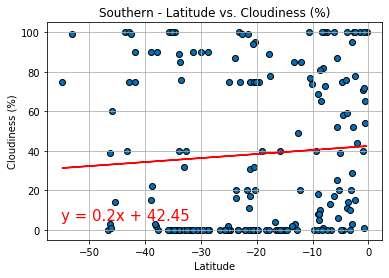

In [50]:
# Plot Scatter Plot for Southern Latitude and Temperature
plt.scatter(southern_weather_data["Lat"],southern_weather_data["Cloudiness"],facecolors="#0072BD",marker="o",edgecolor="black")

# Plt Grid Lines
plt.grid()

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Southern - Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Define x-value as Latitude
x_values = southern_weather_data["Lat"]

# Define y-value as Maximum Temperture
y_values = southern_weather_data["Cloudiness"]

# Perform the Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate Regression Values
regress_values = x_values * slope + intercept

# Caluclate liner equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print coefficient of determination (R-squared)
print(f"The r-squared is: {rvalue**2}")

# Plot line
plt.plot(x_values,regress_values,"r")

# Plot liner equation
plt.annotate(line_eq,(-55,5),fontsize=15,color="red")

# Save Figure
plt.savefig("Images/Southern_Latitude_vs_Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002543074595969891


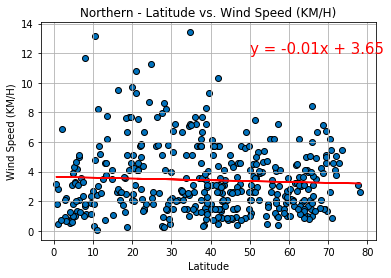

In [51]:
# Plot Scatter Plot for Southern Latitude and Temperature
plt.scatter(northern_weather_data["Lat"],northern_weather_data["Wind Speed"],facecolors="#0072BD",marker="o",edgecolor="black")

# Plt Grid Lines
plt.grid()

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Northern - Latitude vs. Wind Speed (KM/H)")
plt.ylabel("Wind Speed (KM/H)")
plt.xlabel("Latitude")

# Define x-value as Latitude
x_values = northern_weather_data["Lat"]

# Define y-value as Maximum Temperture
y_values = northern_weather_data["Wind Speed"]

# Perform the Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate Regression Values
regress_values = x_values * slope + intercept

# Caluclate liner equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print coefficient of determination (R-squared)
print(f"The r-squared is: {rvalue**2}")

# Plot line
plt.plot(x_values,regress_values,"r")

# Plot liner equation
plt.annotate(line_eq,(50,12),fontsize=15,color="red")

# Save Figure
plt.savefig("Images/Northern_Latitude_vs_Wind_Speed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05041709464051221


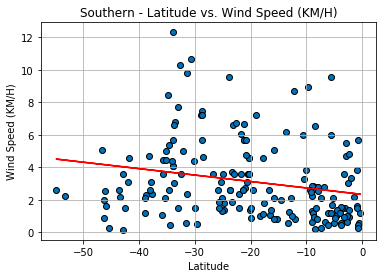

In [52]:
# Plot Scatter Plot for Southern Latitude and Temperature
plt.scatter(southern_weather_data["Lat"],southern_weather_data["Wind Speed"],facecolors="#0072BD",marker="o",edgecolor="black")

# Plt Grid Lines
plt.grid()

# Plot Title, X-Axis Title, & Y-Axis Title
plt.title("Southern - Latitude vs. Wind Speed (KM/H)")
plt.ylabel("Wind Speed (KM/H)")
plt.xlabel("Latitude")

# Define x-value as Latitude
x_values = southern_weather_data["Lat"]

# Define y-value as Maximum Temperture
y_values = southern_weather_data["Wind Speed"]

# Perform the Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate Regression Values
regress_values = x_values * slope + intercept

# Caluclate liner equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print coefficient of determination (R-squared)
print(f"The r-squared is: {rvalue**2}")

# Plot line
plt.plot(x_values,regress_values,"r")

# Plot liner equation
plt.annotate(line_eq,(-25,13),fontsize=15,color="red")

# Save Figure
plt.savefig("Images/Southern_Latitude_vs_Wind_Speed.png")